# Final Project


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.tree as skt
import sklearn.ensemble as skens

## Introduction

### Assignment

In this final project you be analyzing a data set using techniques from Data Science 101. The goal of this project is to demonstrate your ability to apply the concepts you have learned in this course to a real-world data set. You will be graded on the quality of your analysis, the clarity of your code, and the effectiveness of your communication.

Each section will contain a brief description of the task, followed by a code cell where you will write your code. You should write your code in the code cell and run it to generate the output. You will need to interpret the results of your analysis in a way that is understandable to people without a background in statistics or Python programming You should use markdown to format your text in a legible way.

**Individual Effort Policy**: You may use any resources you like to complete this project, including the internet, textbooks, and discussions with other people. You may also use GenAI tools like Copilot or ChatGPT. It is expected that students will use GenAI tools for writing code, and no citation will be required for GenAI assisted code. For the written portions of the project, use of GenAI should be cited in a way that make clear how the GenAI tool was used. The *GenAI Appendix* section at the end provides a template you can use to indicate how you used tools like ChatGPT for each section. You should be prepared to explain any code or written responses that you submit upon request.

### Background

In this assignment, we will analyze two data sets from "Wolves and Moose of Isle Royale" project. The data sets contain information about the populations of wolves and moose on Isle Royale, an island in Lake Superior. The data sets include information about the number of wolves and moose on the island, as well as other variables that may be related to the populations of wolves and moose.

> Isle Royale is a remote wilderness island, isolated by the frigid waters of Lake Superior, and home to populations of wolves and moose. As predator and prey, their lives and deaths are linked in a drama that is timeless and historic. Their lives are historic because we have been documenting their lives for more than five decades. This research project is the longest continuous study of any predator-prey system in the world. ([Source](https://isleroyalewolf.org/overview/overview/at_a_glance.html))

You may find it helpful to read the most recent [Annual Report](https://isleroyalewolf.org/sites/default/files/annual-report-pdf/WolfMooseReport_2024_final-web.pdf) to learn more about the project.


## Data

The data for this project are contained in two CSV files:

In [104]:
wolf_moose_yearly = pd.read_csv("https://github.com/UM-Data-Science-101/final-project/raw/refs/heads/main/wolf_moose_yearly.csv", na_values = ["NA", "N/A", "N/A yet", "NA yet"])
moose_deaths = pd.read_csv("https://github.com/UM-Data-Science-101/final-project/raw/refs/heads/main/moose_deaths.csv")

The `wolf_moose_yearly` data set contains yearly counts of wolf and moose population, along with variables about the environment and other factors that may be related to the populations. The `moose_deaths` data set contains information about the age and size of decreased moose on Isle Royale.

**Task**: Report the number of rows and columns in each data set. Report the column names in each data set.

In [105]:
print("wolf_moose_yearly:")
print("Number of rows:", len(wolf_moose_yearly))
print("Number of columns:", len(wolf_moose_yearly.columns))
print("Column names:", list(wolf_moose_yearly.columns))

print("\nmoose_deaths:")
print("Number of rows:", len(moose_deaths))
print("Number of columns:", len(moose_deaths.columns))
print("Column names:", list(moose_deaths.columns))

wolf_moose_yearly:
Number of rows: 61
Number of columns: 15
Column names: ['year', 'wolves', 'moose', 'kill rate', 'predation rate', 'moose recruitment rate', 'moose mean age excluding calves', 'July-Sept (temp, F)', 'Apr-May (temp, F)', 'Jan-Feb (temp, F)', 'May-Aug (precip, inches)', 'NAO (DJFM - station based)', 'NAO - annual', 'snow.depth (cm)', 'ice bridges (0=none, 1 = present)']

moose_deaths:
Number of rows: 662
Number of columns: 8
Column names: ['Sex', 'Year of birth', 'Cranial Volume (cm3)', 'Winter temperature (standardized)', 'Moose abundance (standardized)', 'Wolf abundance (standardized)', 'Winter temperature (categorical)', 'Age at death']


### Codebook

These data do not include a code-book, but there is written documentation on many of the concepts of what is measured on the [Data & Interpreation](https://isleroyalewolf.org/data/data/home.html) page from the Isle Royale project. For the "NAO" columns, see [this page](https://climatedataguide.ucar.edu/climate-data/hurrell-north-atlantic-oscillation-nao-index-station-based).

**Task**: We will create our own code-book. For each of the variables in both tables complete this template:

* Variable Name:
* Description:
* Type: (e.g., numeric, categorical, etc.)

If there are several variables that are essentially the same, you may summarize them together as a single entry.

In [106]:
print("Codebook for wolf_moose_yearly:\n")


print("Variable Name: year")
print("Description: Year of observation (integer).")
print("Type: numeric")

print("\nVariable Name: wolves")
print("Description: Number of wolves observed (integer).")
print("Type: numeric")

print("\nVariable Name: moose")
print("Description: Number of moose observed (integer).")
print("Type: numeric")

print("\nVariable Name: kill rate")
print("Description: Rate at which wolves kill moose (units can change is ussually per 1000 moose per year or something similar).")
print("Type: numeric")

print("\nVariable Name: predation rate")
print("Description: The rate at which moose are preyed upon by wolves (typically percentage).")
print("Type: numeric")

print("\nVariable Name: moose recruitment rate")
print("Description: Rate of new small moose being added to the population.")
print("Type: numeric")

print("\nVariable Name: moose mean age excluding calves")
print("Description: Average age of moose that are not calves (years).")
print("Type: numeric")

print("\nVariable Name: July-Sept (temp, F)")
print("Description: Average temperature from July to September (Fahrenheit).")
print("Type: numeric")

print("\nVariable Name: Apr-May (temp, F)")
print("Description: Average temperature from April to May (Fahrenheit).")
print("Type: numeric")

print("\nVariable Name: Jan-Feb (temp, F)")
print("Description: Average temperature from January to February (Fahrenheit).")
print("Type: numeric")

print("\nVariable Name: May-Aug (precip, inches)")
print("Description: Total precipitation from May to August (Inches).")
print("Type: numeric")

print("\nVariable Name: NAO (DJFM - station based)")
print("Description: North Atlantic Oscillation index during December to March, based on station data.")
print("Type: numeric")

print("\nVariable Name: NAO - annual")
print("Description: Annual North Atlantic Oscillation index.")
print("Type: numeric")

print("\nVariable Name: snow.depth (cm)")
print("Description: Average snow depth (Centimeters).")
print("Type: numeric")

print("\nVariable Name: ice bridges (0 = none, 1  = present)")
print("Description: Binary indicator for the presence of ice bridges (0 = none, 1 = present).")
print("Type: numeric")

print("\nVariable Name: Temp_Bins")
print("Description: Categorized temperature bins.")
print("Type: categorical")

print("\nVariable Name: temp_range")
print("Description: Range of temperatures observed (Fahrenheit).")
print("Type: numeric")

print("\n")
print("\nCodebook for individual_animal_data:\n")

print("Variable Name: Sex")
print("Description: Sex of the animal.")
print("Type: categorical")

print("\nVariable Name: Year of birth")
print("Description: Year the animal was born (integer).")
print("Type: numeric")

print("\nVariable Name: Cranial Volume (cm3)")
print("Description: Volume of the cranium (Cubic centimeters).")
print("Type: numeric")

print("\nVariable Name: Winter temperature (standardized)")
print("Description: Standardized winter temperature.")
print("Type: numeric")

print("\nVariable Name: Moose abundance (standardized)")
print("Description: Standardized measure of moose abundance.")
print("Type: numeric")

print("\nVariable Name: Wolf abundance (standardized)")
print("Description: Standardized measure of wolf abundance.")
print("Type: numeric")

print("\nVariable Name: Winter temperature (categorical)")
print("Description: Categorized winter temperature.")
print("Type: categorical")

print("\nVariable Name: Age at death")
print("Description: Age at which the animal died (Years).")
print("Type: numeric")

Codebook for wolf_moose_yearly:

Variable Name: year
Description: Year of observation (integer).
Type: numeric

Variable Name: wolves
Description: Number of wolves observed (integer).
Type: numeric

Variable Name: moose
Description: Number of moose observed (integer).
Type: numeric

Variable Name: kill rate
Description: Rate at which wolves kill moose (units can change is ussually per 1000 moose per year or something similar).
Type: numeric

Variable Name: predation rate
Description: The rate at which moose are preyed upon by wolves (typically percentage).
Type: numeric

Variable Name: moose recruitment rate
Description: Rate of new small moose being added to the population.
Type: numeric

Variable Name: moose mean age excluding calves
Description: Average age of moose that are not calves (years).
Type: numeric

Variable Name: July-Sept (temp, F)
Description: Average temperature from July to September (Fahrenheit).
Type: numeric

Variable Name: Apr-May (temp, F)
Description: Average te

### Data Cleaning

**Task**: Check for missing values in each data set. If there are missing values, report the number of missing values for each variable.

In [107]:
print("Missing values in wolf_moose_yearly:\n")
print(wolf_moose_yearly.isnull().sum())

print("\nMissing values in moose_deaths:\n")
print(moose_deaths.isnull().sum())

Missing values in wolf_moose_yearly:

year                                  0
wolves                                0
moose                                 0
kill rate                            13
predation rate                       13
moose recruitment rate                3
moose mean age excluding calves      12
July-Sept (temp, F)                   1
Apr-May (temp, F)                     0
Jan-Feb (temp, F)                     0
May-Aug (precip, inches)              1
NAO (DJFM - station based)            1
NAO - annual                          2
snow.depth (cm)                      16
ice bridges (0=none, 1 = present)     0
dtype: int64

Missing values in moose_deaths:

Sex                                  0
Year of birth                        0
Cranial Volume (cm3)                 0
Winter temperature (standardized)    0
Moose abundance (standardized)       0
Wolf abundance (standardized)        0
Winter temperature (categorical)     0
Age at death                         0
dty

**Task**: suggest a strategy for dealing with missing values in each data set.

Shown in the table above, there are no missing values in moose_deaths so we will only be focusing on wolf_moose_yearly. My strategy for dealing with missing values in each data set is just importing the median of the dataset to fill in the missing value. This is the best choice as the median is the safest option being unfazed by outliers. Another way that could work but isn't directly suggesting a strategy is just dropping the rows with missing values.

In [109]:
for col in wolf_moose_yearly.columns:
    if wolf_moose_yearly[col].isnull().any():
        median = wolf_moose_yearly[col].median()
        wolf_moose_yearly[col].fillna(median, inplace = True)

## Exploratory Data Analysis

In this section, you will explore the distributions of the variables in the data sets. You will also explore the relationships between variables in the data sets.

### Univariate Exploration

**Task**: In this section, select one variable of each type listed below and describe the distribution of the variable. Include at least one plot and at least one numerical summary in your description.

#### Discrete Variable

In [110]:
print("Summary statistics for Wolf Population:\n")
print(wolf_moose_yearly['wolves'].describe())

Summary statistics for Wolf Population:

count    61.000000
mean     21.065574
std       9.998115
min       2.000000
25%      15.000000
50%      21.000000
75%      25.000000
max      50.000000
Name: wolves, dtype: float64


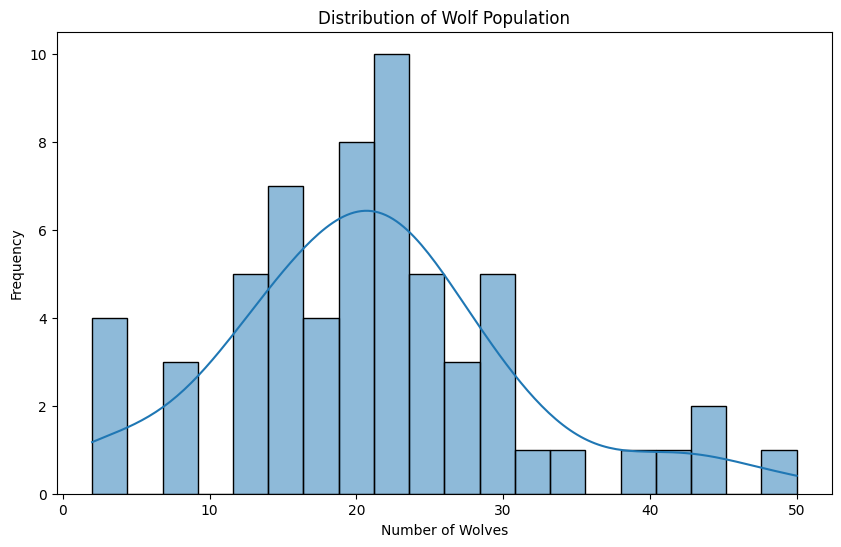

In [111]:
plt.figure(figsize=(10, 6))
sb.histplot(wolf_moose_yearly['wolves'], bins=20, kde=True)
plt.title("Distribution of Wolf Population")
plt.xlabel("Number of Wolves")
plt.ylabel("Frequency")
plt.show()

The mean for the graph is 21.06, standard deviation is around 10, the minimum is 2 with the max being 50 and the 25th, 50th, and 75th quartiles are 15, 21, and 25, respectivly.

#### Numeric Variable

In [112]:
print("Summary statistics for Jan-Feb Mean Temp:\n")
print(wolf_moose_yearly['Jan-Feb (temp, F)'].describe())

Summary statistics for Jan-Feb Mean Temp:

count    61.000000
mean      7.777869
std       5.187497
min      -1.150000
25%       3.350000
50%       7.800000
75%      10.850000
max      20.750000
Name: Jan-Feb (temp, F), dtype: float64


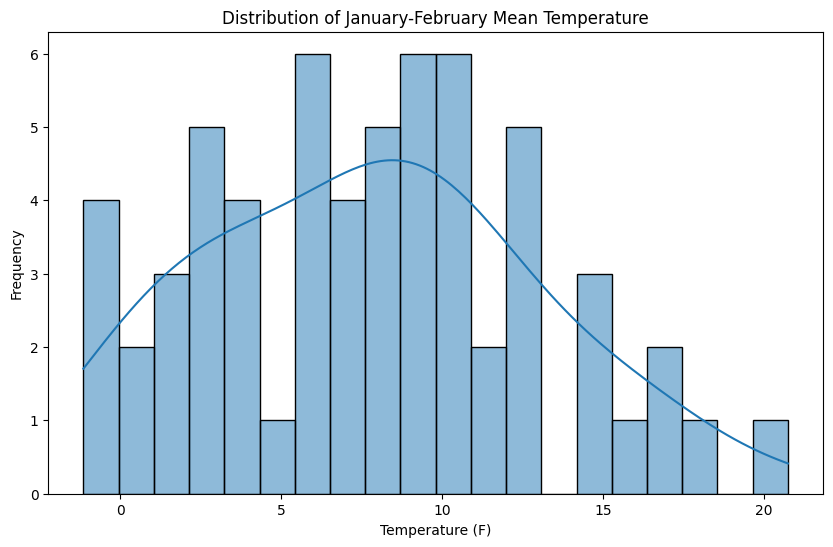

In [113]:
plt.figure(figsize=(10, 6))
sb.histplot(wolf_moose_yearly['Jan-Feb (temp, F)'], bins = 20, kde = True)
plt.title("Distribution of January-February Mean Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.show()

The mean for the graph is close to 7.8, standard deviation is around 5.2, the minimum is -1.15 with the max being 20.75 and the 25th, 50th, and 75th quartiles are 3.35, 7.8, and 10.85, respectivly.

### Multivariate Exploration


**Task**: In this section, select pairs of variables of combination of types listed below and describe either the joint distributions or conditional distributions in which you condition on one of the variables. Include at least one plot and at least one numerical summary in your description.



#### Discrete-Discrete

In [114]:
wolves_moose_summary = wolf_moose_yearly.groupby('wolves')['moose'].describe()
print("Moose Population Based off Wolf Population\n")
print(wolves_moose_summary)

Moose Population Based off Wolf Population

        count         mean         std     min      25%     50%      75%  \
wolves                                                                     
2         3.0  1458.333333  150.692844  1300.0  1387.50  1475.0  1537.50   
3         1.0  1250.000000         NaN  1250.0  1250.00  1250.0  1250.00   
8         1.0   975.000000         NaN   975.0   975.00   975.0   975.00   
9         2.0   900.000000  212.132034   750.0   825.00   900.0   975.00   
12        4.0  1392.250000  256.541582  1116.0  1224.00  1378.0  1546.25   
13        1.0  1784.000000         NaN  1784.0  1784.00  1784.0  1784.00   
14        2.0   852.500000  102.530483   780.0   816.25   852.5   888.75   
15        2.0  1687.500000  526.794552  1315.0  1501.25  1687.5  1873.75   
16        3.0  1226.000000  816.027573   515.0   780.50  1046.0  1581.50   
17        3.0  1386.000000  547.257709  1041.0  1070.50  1100.0  1558.50   
18        1.0  1045.000000         NaN  1045

<ipython-input-115-776e1f4f8ef3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x = 'wolves', y = 'moose', data = wolf_moose_yearly, ci = None)


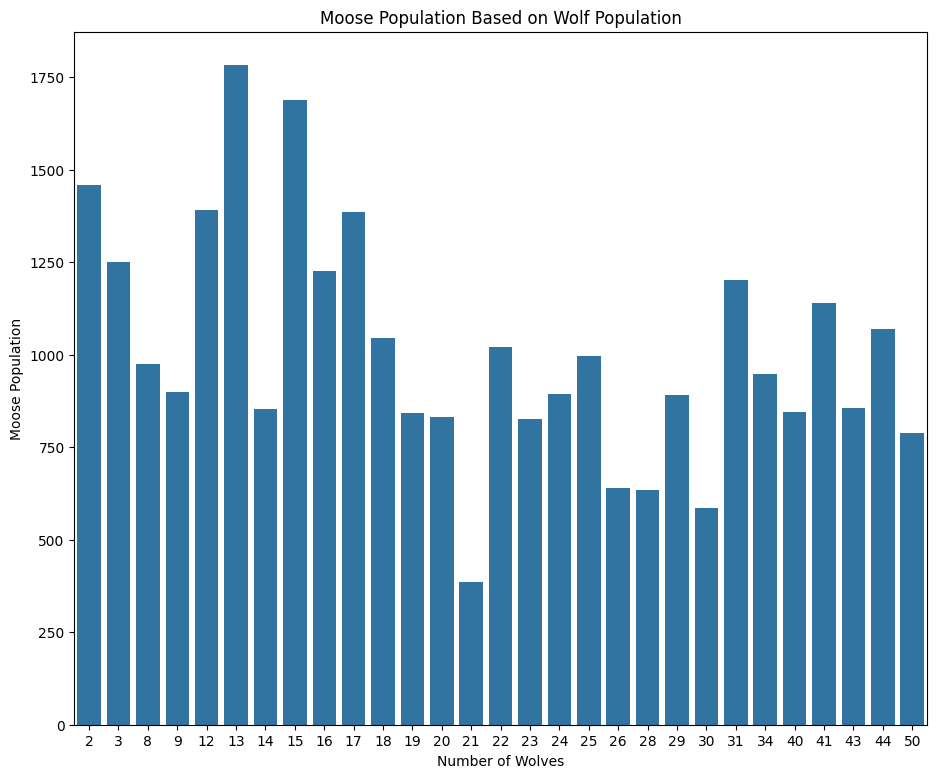

In [115]:
plt.figure(figsize=(11, 9))
sb.barplot(x = 'wolves', y = 'moose', data = wolf_moose_yearly, ci = None)
plt.title('Moose Population Based on Wolf Population')
plt.xlabel('Number of Wolves')
plt.ylabel('Moose Population')
plt.show()

#### Discrete-Numeric

In [116]:
print("Summary statistics for Wolf Population based on Jan-Feb Temperature:\n")
print(wolf_moose_yearly.groupby('Jan-Feb (temp, F)')['wolves'].describe())

Summary statistics for Wolf Population based on Jan-Feb Temperature:

                   count  mean        std   min    25%   50%    75%   max
Jan-Feb (temp, F)                                                        
-1.15                1.0  43.0        NaN  43.0  43.00  43.0  43.00  43.0
-1.05                1.0   9.0        NaN   9.0   9.00   9.0   9.00   9.0
-0.40                1.0  17.0        NaN  17.0  17.00  17.0  17.00  17.0
-0.35                1.0  20.0        NaN  20.0  20.00  20.0  20.00  20.0
-0.05                1.0  23.0        NaN  23.0  23.00  23.0  23.00  23.0
 0.40                1.0  14.0        NaN  14.0  14.00  14.0  14.00  14.0
 1.25                1.0  28.0        NaN  28.0  28.00  28.0  28.00  28.0
 1.40                1.0  20.0        NaN  20.0  20.00  20.0  20.00  20.0
 1.70                1.0  26.0        NaN  26.0  26.00  26.0  26.00  26.0
 2.15                1.0  23.0        NaN  23.0  23.00  23.0  23.00  23.0
 2.75                1.0  22.0        NaN 

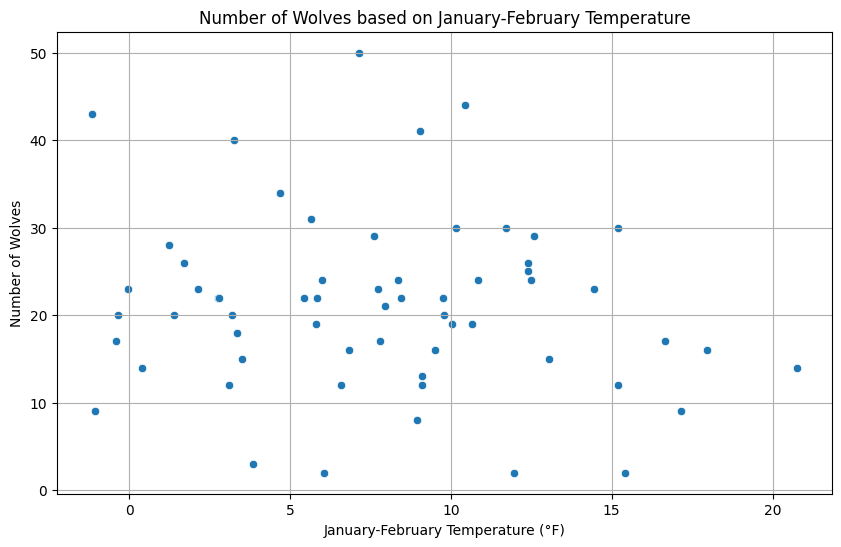

In [117]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x = 'Jan-Feb (temp, F)', y = 'wolves', data = wolf_moose_yearly)
plt.title('Number of Wolves based on January-February Temperature')
plt.xlabel('January-February Temperature (°F)')
plt.ylabel('Number of Wolves')
plt.grid(True)
plt.show()

#### Numeric-Numeric

In [118]:
print("Summary statistics for Moose Population based on Snow Depth:\n")
print(wolf_moose_yearly.groupby('snow.depth (cm)')['moose'].describe())

Summary statistics for Moose Population based on Snow Depth:

                 count         mean         std     min     25%     50%  \
snow.depth (cm)                                                           
6.780              1.0   900.000000         NaN   900.0   900.0   900.0   
7.087              1.0   385.000000         NaN   385.0   385.0   385.0   
8.209              1.0  1100.000000         NaN  1100.0  1100.0  1100.0   
10.265             1.0  2117.000000         NaN  2117.0  2117.0  2117.0   
11.170             1.0   767.000000         NaN   767.0   767.0   767.0   
11.654             1.0   975.000000         NaN   975.0   975.0   975.0   
11.811             1.0  1031.000000         NaN  1031.0  1031.0  1031.0   
12.785             1.0   927.000000         NaN   927.0   927.0   927.0   
12.913             1.0   510.000000         NaN   510.0   510.0   510.0   
13.504             1.0   976.000000         NaN   976.0   976.0   976.0   
14.057             1.0  1046.000000   

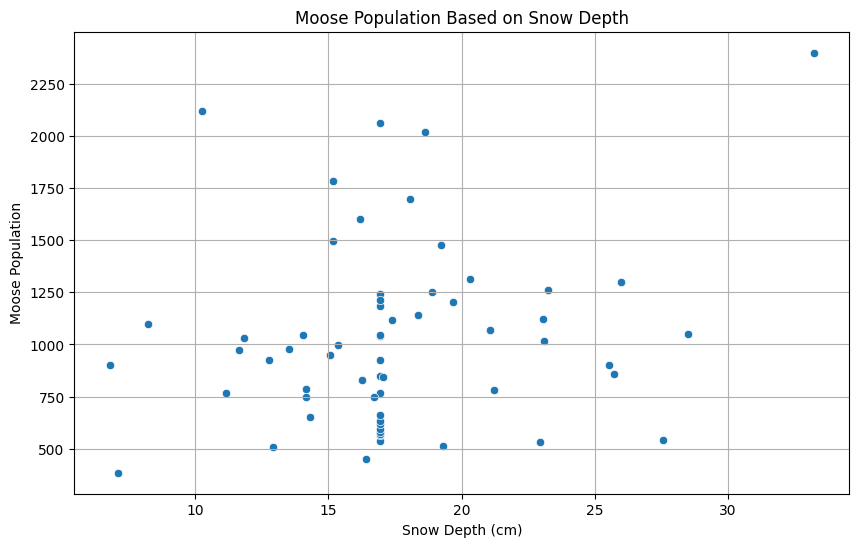

In [119]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x = 'snow.depth (cm)', y = 'moose', data = wolf_moose_yearly)
plt.title('Moose Population Based on Snow Depth')
plt.xlabel('Snow Depth (cm)')
plt.ylabel('Moose Population')
plt.grid(True)
plt.show()

### Summary

**Task**: Based on your exploration of these data, write up a paragraph of your findings. What are the key features of the data? What relationships do you see between the variables? What variables might be related to the populations of wolves and moose on Isle Royale? Consider how these questions can be answered in the next section when we perform inference.

I found that the wolf population has a mean of 21 wolves per year, with a standard deviation of around 10 wolves. It is a pretty symmetrical distribution with a everso slight skew towards the higher values. On the other hand, the mean temperature for January-February is averaged at about 7.8°F, with a standard deviation of about 5.2°F. There is a low and a max of -1.15 and 20.75 degrees Farenheit and the distribution is normal. I also tested if the amount of wolves would impact the moose population. In the end, I found that that it does not directly impact moose populations and there appears to be more randomized flucuations. For the wolf population based on January temperature through the month, I created a scatterplot to visualize our data and also created a table. Through these two tools, I found that there was no clear or direct relationship between the two. Lastly, for the moose population based on snow depth, I found the scatterplot to show a very weak positive relationship. This means that there is a small impact on snow depth on moose population, saying deeper snow means a higher population of moose.

## Inference

In this section we will perform inference: make guesses about populations or future data based on our sample data.

### Population and Sampling

**Task**: Describe the population of interest in this study. What is the population you are trying to make inferences about? What is the sample in this study? What is the relationship between the population and the sample? You may consider hypothetical populations or data generating processes if you find those more natural to articulate.

The population of interest in this study includes all wolves and moose present on Isle Royale over a period. This population considers other enviromental factors that will affect the two populations on Isle Royale.
The sample is data collected over a certain amount of years, with it tracking the yearly recorded data from various variables that either directly or indirectly affect the wolf and moose population. This shows the records yearly which is important to research and understanding Isle Royale. The samples in the moose_deaths table include numerous individual records from the moose population. Since it is impractical to capture comprehensive data for the entire hypothetical population statistics of all wolves and moose, sampling enables us to make inferences based on the data I collect. This includes yearly statistics recorded in the wolf_moose_yearly table and the detailed records of moose deaths.



### Hypothesis Testing

#### Theory

**Task**: give a theory you would like to test about the population you identified in the previous section. Explain how you can use the format of a hypothesis to test that theory. Clearly describe the population parameter, parameter space, null hypothesis, and alternative hypothesis you will use to test this theory.

**Theory to Test:**
I want to test if there is a linear relationship between the wolf population and snow depth on Isle Royale.

**Population Parameter:**
The population parameter of interest is the p-value between the wolf population and snow depth.

**Parameter Space:**
The true correlation coefficient between wolf population and snow depth. All real numbers.

**Null Hypothesis:**
There is not a significant linear relationship between the wolf population and snow depth.

**Alternative Hypothesis:**
There is a significant linear relationship between the wolf population and snow depth.

#### Application

**Task**: Select a tolerance for Type I error ($\alpha$-level). Perform the hypothesis test you described in the previous section. Report the results of the test using either a rejection region or a p-value. Do you reject the null hypothesis? What is your conclusion about the theory you tested?

In [122]:
import scipy.stats
from scipy.stats import pearsonr
wolf_population = wolf_moose_yearly['wolves']
snow_depth = wolf_moose_yearly['snow.depth (cm)']
correlation_coefficient, p_value = pearsonr(wolf_population, snow_depth)

print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis because the linear relationship between the wolf population and snow depth is statistically significant.")
else:
    print("Fail to reject the null hypothesis because the linear relationship between the wolf population and snow depth is not statistically significant .")

P-value: 0.9496856612384368
Fail to reject the null hypothesis because the linear relationship between the wolf population and snow depth is not statistically significant .


The findings from this analysis indicate that snow depth does not directly correlate with wolf population numbers based on the data I analyzed. This is because the p-value which was 0.949 was much bigger than the alpha level meaning we rejected the null hypothesis and that it was not statistically significant.

### Confidence Interval

#### Theory

**Task**: Identify a different population parameter than the one you used in the previous section. Explain how you can use the format of a confidence interval to make inferences about this population parameter. Clearly describe the population parameter, confidence level, and confidence interval you will use to make inferences about this population parameter.

**New Population Parameter:**
I will estimate the mean moose population on Isle Royale.

**Confidence Interval:**
A confidence interval provides the range of values where we believe the population parameter lies inside a level of confidence.

**Confidence Level:**
95% confidence level for this interval.

#### Application

**Task**: Select a confidence level for your confidence interval. Compute the confidence interval for the population parameter you identified in the previous section. Report the results of the confidence interval. What is your conclusion about the population parameter you are making inferences about? What does this tell you about wolves and moose on Isle Royale?

In [123]:
mean_moose = wolf_moose_yearly['moose'].mean()
std_moose = wolf_moose_yearly['moose'].std()
n_moose = len(wolf_moose_yearly['moose'])

confidence_level = 0.95
z_critical = scipy.stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * (std_moose / np.sqrt(n_moose))
confidence_interval = (mean_moose - margin_of_error, mean_moose + margin_of_error)

print(f"Mean Moose Population: {mean_moose:.2f}")
print(f"Standard Deviation of Moose Population: {std_moose:.2f}")
print(f"95% Confidence Interval for Mean Moose Population: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

Mean Moose Population: 1020.64
Standard Deviation of Moose Population: 434.49
95% Confidence Interval for Mean Moose Population: (911.60, 1129.67)


The results of our analysis indicate that the 95% confidence interval for the mean moose population on Isle Royale ranges from approximately 911 to 1129 moose. This means that we can be 95% confident that the true mean moose population lies within this range.

### Regression

#### Theory

Linear regression is a statistical method that models the relationship between the conditional mean of an outcome and one or more predictors as a linear function:

$$E(Y \mid x_1, x_2, \ldots ) = a + b_1 x_1 + b_2 x_2 + \ldots $$

**Task**: Identify an outcome and two or more predictors you think may be related to the conditional mean of the outcome. Explain how you can use linear regression to model the relationship between the outcome and the predictors. Explain how linear regression can be used to test theories about the relationships between the outcome and the predictors; in particular comment on what it would mean if $b = 0$ for each of the predictors in the model.

I want to see how the different factors can affect the moose population on Isle Royale. I will focus on the predictors of wolf population and snow depth. Using linear regression, I will find the impact of one-unit change in these predictors on the moose population. This finds any significant relationship between the predictors and the outcome. If the coefficient of b is zero for the predictors, it means the predictor is seperate from the outcome and is not significant. That means a will represent the moose population when no predictors and present.

#### Application

**Task**: Fit a linear regression model to the data. Report the results of the model. What are the coefficients of the model? What is the interpretation of the coefficients? Given either confidence intervals or hypothesis tests to test if $b = 0$ for each coefficient. What do you conclude about the relationships between the predictors and the outcome based on those intervals/tests? What is the $R^2$ of the model? What is the interpretation of the $R^2$?

In [124]:
X = wolf_moose_yearly[['wolves', 'snow.depth (cm)']]
y = wolf_moose_yearly['moose']

X = sm.add_constant(X)
model_sm = sm.OLS(y, X).fit()
print(model_sm.summary())
print(model_sm.conf_int(alpha = 0.05))

                            OLS Regression Results                            
Dep. Variable:                  moose   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     5.231
Date:                Tue, 17 Dec 2024   Prob (F-statistic):            0.00815
Time:                        03:25:34   Log-Likelihood:                -451.52
No. Observations:                  61   AIC:                             909.0
Df Residuals:                      58   BIC:                             915.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1041.9728    223.647     

The intercept shows that if there were zero wolves and the snow depth was at zero, the moose population would be at 1041.97. A one unit increase in wolf population is a decrease of 14.81 moose while an one unit increase in snow depth is a increase of 16.65 moose. This means there is a negative relationship
with wolves and moose but a positive with moose and snow depth. Wolf population has a significant impact on the moose while snow depth does not have a very significant impact on the moose population based on its p-value of 0.124. Looking at the R squared value, which is 0.153, we can see that 15.3% of the moose population can accounted for using the factors of the wolf population and snow depth. This means a lot of the moose population remains remains influenced by other predictors.

### Classification

#### Theory

**Task**: Select a different outcome than the previous section that would be appropriate to use with a classification technique and predictors your think may be related to the outcome. Select a classification technique that you think would be appropriate for this data. Explain how you can use classification to model the relationship between the outcome and the predictors. Explain how classification can be used to test theories about the relationships between the outcome and the predictors. Be sure to explain how either training-test sets or cross-validation can be used to evaluate the accuracy of the model.

I will again test moose population and classify moose population as high if it is above the median and low if it is below the median. Our predictors are again wolf population and snow depth but also mean temperature in January. I will be using logistic regression which I had to relearn. It is good to use here as it's good for binary classification and helps in looking at the relationship between the predictors and the outcome. It can model the relationship by finding the probability of a high determined moose population based on the the predictors. This shows how changes in these predictors would affects the likelihood of a high moose population. I can use cross-validation in order to evalutate the accuracy of the model. In k-fold cross-validation, the data is split into k subsets. The model is trained on k-1 subsets and tested on the remaining subset. This process is repeated k times, and the average performance metric is calculated to give an estimate of the model's accuracy.

#### Application

**Task**: Use the classification technique you selected to model the relationship between the outcome and the predictors. Report the results of the model. Use the model to predict some interesting cases. Use either a training-test set split or cross validation to assess the accuracy of the classifier. If the classifier has tuning parameters, try several values of the tuning parameters to see how they affect the accuracy of the classifier.

In [125]:
from sklearn.model_selection import cross_val_score

median_moose = wolf_moose_yearly['moose'].median()
wolf_moose_yearly['moose_above_median'] = (wolf_moose_yearly['moose'] > median_moose).astype(int)

predictors = ['wolves', 'snow.depth (cm)', 'Jan-Feb (temp, F)']
outcome = 'moose_above_median'

X = wolf_moose_yearly[predictors]
y = wolf_moose_yearly[outcome]
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=42)

logreg = sklm.LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy of Logistic Regression: {accuracy}")

interesting_cases = pd.DataFrame({
    'wolves': [10, 40],
    'snow.depth (cm)': [50, 100],
    'Jan-Feb (temp, F)': [0, 10]
})

predicted_probabilities = logreg.predict_proba(interesting_cases)
print(f"\nPredicted Probabilities for Interesting Cases:\n{predicted_probabilities[:, 1]}")

k = 5
scores = cross_val_score(logreg, X, y, cv=k)
mean_accuracy = np.mean(scores)
print(f"\nMean Accuracy from {k}-fold Cross-Validation: {mean_accuracy}")

Accuracy of Logistic Regression: 0.6923076923076923

Predicted Probabilities for Interesting Cases:
[0.96592913 0.99570135]

Mean Accuracy from 5-fold Cross-Validation: 0.6397435897435898


The logistic regression model had an accuracy of approximately 69% in both tests, meaning it had a consistent preformance through the subsets of data. The optimal model therefore reinforced our ideas on how predictors like wolf population and snow depth contribute to classifiying moose populations as high or low. It is also important to look at the values of the coefficients in the logistic regression model to find how influential each predictor is ultimalty on the moose population.




## Conclusion

**Task**: Write a conclusion to your analysis. Summarize the key findings of your analysis. What relationships did you find between the variables in the data? What inferences did you make about the populations of wolves and moose on Isle Royale? What theories did you test? What conclusions did you draw from those tests? What predictions did you make about the data? What conclusions did you draw from those predictions? What suggestions do you have for future data collection Isle Royale? What else would you like to learn about the populations of wolves and moose?

I found a lot of things inside this final project. The major thing that I focused on this project and drilled in was the question of, what affects the moose population?

First, I found that the population of wolves is relativly symetrical and has some higher values. On the same note, more specifically, the average population was around 21 with a standard deviation of 10. Then we measured the average temperature in January which we found to be a normal distribution with a mean around 7.8 degrees Farenheit and a standard deviation around 5.2 degrees Farenheit. For the population of moose based on wolves, we say there was no direct impact and there appeared to be more flucuations keeping it more open ended. I try to anwser this problem later down in the project. I then tested wolf population and moose population based on snow depth which I found there to be no significance between snow depth and wolf population and moose population and snow depth. Though, I was slightly convinced that snow depth was a factor in moose population so I pursued it in a later section. I then did a hypothesis test on wolf population and snow depth which I found the p-value to be around 0.9 so I rejected the null hypothesis as my p-value > alpha value (0.5). This mean't there was no significance in the relationship between wolf population and snow depth. I also conducted a confidence test for moose population and found that for the 95% confidence interval, the mean moose population on Isle Royale ranges from approximately 911 to 1129 moose. This means that we can be 95% confident that the true mean moose population lies within this range. We finally found in the next section (regression) that wolves have an inverse relationship with moose meaning the more wolves, the less moose there are. We also found that snow depth equated to more moose per every cm but had a non-significant impact. Finally, we had regression which I struggled a lot on and had to get help through watching videos and going to office hours but using logistic regression, my model was around 69% accurate in test set and cross-validation meaning it was pretty consistent. The model showed that wolf population and snow depth significantly contribute to if the moose population is high or low. We found that it supported our before ideas of wolf populations dropping moose populations and snow depth increasing moose populations. By anylizing the coefficients also, it showed me how much impact each predictor had on the moose population also. I am very happy how this turned out as I answered my primary question in depth and also other questions about Isle Royale.

Advice I have for gathering data is just simply expanding how many different variables there are. They could measure things like wind speed or humidity levels. I want to try to learn about the whole of Isle Royale with more species and not just wolves and moose. I want to see how adding different animals changes the population of these two. Additionally, I want to see another ecosysmic activity which is how humans have an impact on these two animals.


## GenAI Appendix

### Template

Please copy this template and use it to indicate how you used GenAI tools in each section of the project.

* Section Title:
* Description of Use/Prompt:
* Output from GenAI Tool:

Example:

* Section Title: Univariate Exploration, Discrete Variable
* Description of Use/Prompt: I used ChatGPT to help me write a description of the distribution of the discrete variable.
* Output from GenAI Tool: The discrete variable is a categorical variable that represents different categories. The distribution of the discrete variable shows that the categories are not evenly distributed. Some categories have a higher frequency than others. The most common category is category 1, which occurs in 30% of the observations. The least common category is category 3, which occurs in 10% of the observations.

## GenAI Appendix

### Template

Please copy this template and use it to indicate how you used GenAI tools in each section of the project.

* Section Title: Classification
* Description of Use/Prompt: What is k-fold cross validation? explain it minimal description
* Output from GenAI Tool:
In k-fold cross-validation, the data is split into k subsets. The model is trained on k-1 subsets and tested on the remaining subset. This process is repeated k times, and the average performance metric is calculated to give an estimate of the model's accuracy.

Example:

* Section Title: Univariate Exploration, Discrete Variable
* Description of Use/Prompt: I used ChatGPT to help me write a description of the distribution of the discrete variable.
* Output from GenAI Tool: The discrete variable is a categorical variable that represents different categories. The distribution of the discrete variable shows that the categories are not evenly distributed. Some categories have a higher frequency than others. The most common category is category 1, which occurs in 30% of the observations. The least common category is category 3, which occurs in 10% of the observations.

## GenAI Appendix

### Template

Please copy this template and use it to indicate how you used GenAI tools in each section of the project.

* Section Title: Classification
* Description of Use/Prompt: Intepret this:

Accuracy of Logistic Regression: 0.6923076923076923

Predicted Probabilities for Interesting Cases: [0.96592913 0.99570135]

Mean Accuracy from 5-fold Cross-Validation: 0.6397435897435898

* Output from GenAI Tool: 1. Model Accuracy
Accuracy of Logistic Regression: 0.692
The logistic regression model achieved an accuracy of approximately 69.2%. This indicates that the model correctly classified the high and low moose populations about 69.2% of the time on the test set. This level of accuracy suggests the model has some predictive power, though there is room for improvement.

2. Predicted Probabilities for Interesting Cases
Predicted Probabilities: [0.96592913, 0.99570135]
Two interesting cases were tested using the logistic regression model:

The first case (wolves = 10, snow depth = 50 cm, Jan-Feb temp = 0°F) had a predicted probability of approximately 96.6% for being a high moose population.
The second case (wolves = 40, snow depth = 100 cm, Jan-Feb temp = 10°F) had a predicted probability of approximately 99.6% for being a high moose population.
These high predicted probabilities indicate a strong likelihood of these cases resulting in a high moose population, according to the model.

3. Cross-Validation Accuracy
Mean Accuracy from 5-fold Cross-Validation: 0.640
Cross-validation was used to evaluate the model's performance more robustly. The mean accuracy from 5-fold cross-validation was approximately 64.0%. This means that, on average, the logistic regression model correctly classified the high and low moose populations 64.0% of the time, when evaluated across different subsets of the data.

Overall Interpretation:
Consistency: The test set accuracy (69.2%) and cross-validation accuracy (64.0%) suggest that the model performs fairly consistently across different subsets of data.
Model Performance: While the model shows a moderate level of accuracy, it indicates there is still 30-36% of misclassification rate, meaning more sophisticated models or additional predictors might be needed to improve predictive performance.
Predicted Probabilities: The high predicted probabilities for the interesting cases indicate that when certain conditions are met (e.g., low wolf population, high snow depth), the model strongly predicts a high moose population. This suggests that these predictors are meaningful in determining the moose population status even though other factors might need to be considered for enhancing accuracy.
This interpretation demonstrates the logistic regression model's potential in classifying moose populations while also indicating areas where further improvement is required.

Example:

* Section Title: Univariate Exploration, Discrete Variable
* Description of Use/Prompt: I used ChatGPT to help me write a description of the distribution of the discrete variable.
* Output from GenAI Tool: The discrete variable is a categorical variable that represents different categories. The distribution of the discrete variable shows that the categories are not evenly distributed. Some categories have a higher frequency than others. The most common category is category 1, which occurs in 30% of the observations. The least common category is category 3, which occurs in 10% of the observations.